# Supervised Learning: Classification


#### A Recap
* What is the difference between supervised and unsupervised learning?
    - Supervised Learning has labelled targets (continuous/Discrete numeric or categorical)
    - Unsupervised learning has no such labels
    
* What is the difference between the classification and regression (function approximation) problems in ML?
    - Regression is used when the target variable is numeric/continuous
    - Classification is used when the target variable is categorical

# Introduction to Classification
* A supervised learning task in which the output variables($y$) that is to be predicted is a discrete value, referred to as a class label
* Classification itself is divided into binary (just two labels) or multiclass classification (many labels)
* *examples*
    - classifying emails as spam or not based on the subject or body
    - Given handwritten character images, classify it to be one of the known characters,
    - Given details of a financial transaction, classify it to be genuine or fraudulent, 
    - Given details of a tumour classify it as benign or malignant, 
    - Given the parameters of a process, classifying if there is a fault in the process or not

# Classification: Feature Space Perspective
* A classifier divides the feature space into a set of regions each having a class label associated with it.
![](linonlin.webp)

* The Boundaries between these regions can be straight or curved, smooth or rough depending on the prediction function
* These are referred to as *Decision Boundaries*

# Types of Classification Models
* We can classify the Classification models based on:
    1. Nature of Decision Boundary
        - Linear
        - Non-linear
    2. Number of Classes
        - Binary Classification (only 2 classes)
        - Multiclass classification (more than 2 classes)
![](multvbin.png)

# Soft vs Hard Predictions in Classification
1. Soft Prediction: Classifier predicts the probability of a datapoint belonging to each of the target classes
2. Hard Prediction: Classifier predicts the class that the data point might belong to

* Soft Prediction gives more information on the confidence of the classifier in the prediction made
* Soft Prediction can be turned hard by setting a probability threshold
![](hardvsoft.png)

# Classification Algorithms
* Algorithms for Linear Classifiers
    - Logistic Regression: soft predictions
    - Linear Discriminant Classifier: soft predictions
    - Naive Bayes: soft predictions
    - SVM (Linear Kernel): Hard Predictions
* Linear Classifiers perform best when the classes are linearly separable or close to linear separable
* Algorithms for Non-Linear Classifiers
    - K-Nearest-Neighbours(KNN): Hard predictions
    - Neural Networks (MLPs): soft predictions
    - SVM (Non-Linear Kernel): Hard predictions
    - Decision Tree, Random Forest and Boosting: soft predictions

## Some points to Note
* Pre-processing technqiues used for regression can also be used for classification
* Binary Classification: classes are referred to as positive(1) and negative(0)
* Model Validation: Model validation techniques used in regression can be used for classification
* Prediction Accuracy: Number of samples correctly predicted by total number of samples used in prediction-$N_c/N$
* Prediction Error: Number of samples which are mis-classified, that is class predicted is different from actual class.
* Percentage Error can be taken by dividing the number of mis-classified samples by total number of sampled used in prediction- $(1-N_c/N)$

# K-Nearest Neighbour Classifier
* Data points are classified based on their neigbours in the feature space
* Majority of the classes of the $k$-nearest neighbours is taken as the class for a data point
* $k$ is a hyper-parameter to be decided by the user.
* No Model is learnt and stored in this classifier - lazy classifier
* It is non-parametric and makes no assumptions on data distribution
* **Weighted KNN**: While the majority among $k$ neighbours, they can be weighed by the reciprocal of their distance $w=\frac{1}{d(x,x_n)}$
* $k$ can be chosen through:
    - Trial and error by observing the error in prediction for different values of $k$
    - Set $k=\sqrt{n}$, $n$ is number of features

# Logistic Regression
* It is a classification technique.
* Here, the decision boundary (generally linear) is derived based on probability interpretation
    - results in a non- linear optimization problem for parameter estimation
* **Goal**: Given a new data point, predict the class from which the data point is likely to have originated

## Binary Classification problem
* Classification is the task
    - Of identifying a category that a new observation belongs to based on the data with known categories
* when the number of categories is two, then it becomes a binary classification problem
* Binary classification can be seen as a simple 'yes' or 'no' problem
---
## Input Features
* Input features can be both qualitative and quantitative
* If the inputs are qualitative, then there has to be a systematic way of converting them to quantities.
    - *eg* A binary input like 'yes' 'no' can be encoded as '1' and '0'
* Some data analytics approach can handle qualitative variables directly
___
## Linear Classifier
* Decision function is linear
* Binary classification can be performed depending on the side of the half-plane that the data falls in
* However, simply guessing 'yes' or 'no' is pretty crude
* We can use probabilities instead, in particular,
    - $p(C=1|X)$ and $p(C=0|X)$, conditional probabilities
![](linclass.webp)

---
## Why Model Probabilities?
* The probability of a 'yes' or 'no' gives a better understanding of the sample's membership to a particular category
* Estimating the binary outputs from the probabilities is straight forward through simple thresholding
* How does one model this probability?
---
## Linear and Log Models
* Make $p(x)$ a linear function of $x$
    - $p(x)=\beta_0+\beta_1X$
    - This gives no guarantee that $p(x)\in[0,1]$
    - It might give nonsensical results making it difficult to interpret them as probabilites
* Make $log(p(x))$ a linear function of $x$
    - $log(p(x)) = \beta_0+\beta_1X$
    - This however is only bounded on one side, as $p(x)\in(0,\infty)$
---
## Sigmoid function
* Make $p(x)$ a sigmoid function of $x$
    - $p(x) = e^{\beta_0+\beta_1X}/(1+e^{\beta_0+\beta_1X})$, the logit function
    - or, $log(\frac{p(x)}{1-p(x)})=\beta_0+\beta_1X$, the decision boundary
* The problem now becomes one of finding the parameters $\beta_0$ and $\beta_1$
* $p(x)$ bounded above by $1$ and below by $0$
* Good modeling choice for real life scenarios
* The LHS can be interpreted as the log of odds-ratio in the second equation
![](sigmoid.png)

## Estimation of the parameters
* We find parameters in such a way that plugging these in the model equation should give the best possible classification for the inputs from both the classes
* This can be formalized by maximizing the following likelihood function
    - $L(\beta_0,\beta_1)=\Pi_{i=1}^np(x_i)^{y_i} (1-p(x_i))^{(1-y_i)}$
        * When $x_i$ belongs to class $0$, $y_i=0$
        * When $x_i$ belongs to class $1$, $y_i=1$
    - We are looking to maximize
        * $p(C=1|x_i)\sim 1$ when $x_i \in C_1$
        * $p(C=0|x_i)\sim 0$ when $x_i \in C_0$  

## Log-likelihood function
* The log-likelihood function will become:
<p style='text-align:center;'> $L(\beta_0,\beta_1)=\Sigma_{i=1}^{n}y_ilog(p(x_i))+(1-y_i)log(1-p(x_i))$</p>
* Simplifying this express and using the definition for $p(x)$ will result in an expression with the parameters of the linear decision boundary
* Now the parameters can be estimated by maximizing the above expression using any nonlinear optimization solver

## The Logit Model
* The binary output for new samples can now be easily predicted using the following:
<p style='text-align:center;'> $p(x) = e^{\beta_0+\beta_1X}/(1+e^{\beta_0+\beta_1X})$</p>
* If $\beta_0+\beta_1X$ is non-negative then we get $p>.5$ and $C=1$ otherwise we get $p<.5$ and $C=0$
* The Decision boundary is the equation $\beta_0+\beta_1X$

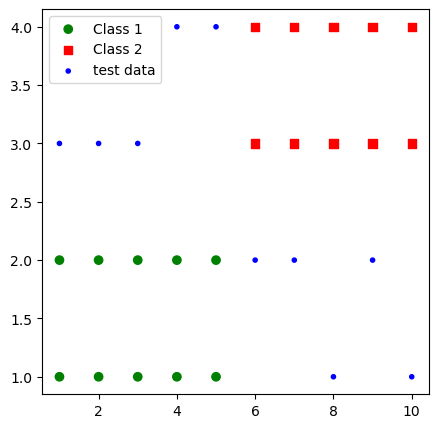

In [16]:

import numpy as np
import matplotlib.pyplot as plt

# an example 
C1 = np.array([[1,1],[2,1],[3,1],[4,1],[5,1],[1,2],[2,2],[3,2],[4,2],[5,2]])
C2 = np.array([[6,3],[7,3],[8,3],[9,3],[10,3],[6,4],[7,4],[8,4],[9,4],[10,4]])

# testing data
test = np.array([[1,3],[2,3],[4,4],[5,4],[3,3],[6,2],[9,2],[8,1],[7,2],[10,1]])

fig,ax= plt.subplots(figsize=(5,5))
ax.scatter(C1[:,0],C1[:,1],ls='',marker='o',color='g',label='Class 1')
ax.scatter(C2[:,0],C2[:,1],ls='',marker='s',color='r',label='Class 2')
ax.scatter(test[:,0],test[:,1],ls='',marker='.',color='b',label='test data')
ax.legend()
plt.show()

#### Results for above example
* Input features: $X_1,X_2$
* Classes: $0$ and $1$
* Parameters:
    - $\beta_0=-42.55$
    - $\beta_1=2.95$
    - $\beta_2 = 10.40$

In [26]:
# calculating the probabilities with the following data:
aug_test = np.hstack([np.ones((test.shape[0],1)),test])

# creating the parameter vector
params = np.array([[-42.54,2.95,10.40]]).T

# matrix-vector multiplication:
expo = aug_test@params

#finding the denom of the sigmoid
denom = 1+np.exp(-expo)

#the probabilities are:
probs = 1/denom

# we can now decide the classes as:
class_ = np.zeros((probs.shape[0]))
for i in range(probs.shape[0]):
    if probs[i]>.5:
        class_[i]=1
        
import pandas as pd
#creating a dataframe
df = pd.DataFrame(index = np.arange(test.shape[0]),data={
    'X1':test[:,0],
    'X2':test[:,1],
    'Prob':probs.reshape(10),
    'class':class_.reshape(10)
})
df

,X1,X2,Prob,class
0,1,3,0.000227,0.0
1,2,3,0.004321,0.0
2,4,4,0.999981,1.0
3,5,4,0.999999,1.0
4,3,3,0.076562,0.0
5,6,2,0.017293,0.0
6,9,2,0.991918,1.0
7,8,1,0.000195,0.0
8,7,2,0.251618,0.0
9,10,1,0.066608,0.0


## Which classification method to use?
* Basic Classifiers: Logistic Regression, Linear Discriminant Analysis, KNN-based classifier, Naive Bayes classifier
* Advanced Classifiers: SVM, Random Forest, Boosting Trees and Neural Networks
* Build some of the basic classifiers before moving on to the more advanced ones
* Large amount of data would be required to build good models using advanced classifiers
* LDA can be used as a pre-processing step to reduce dimensionality before building a classifier

## Handling Data Imbalance in Classification
* Data Imbalance refers to the scenario where the majority of samples belonging to each class are skewed (majority and minority class)
* In binary classification problem, data is imbalanced if:
<p style='text-align:center;'>$N_0$ (Nof training samples of class $0$) $>>N_1$ (Nof training samples of class $1$)</p>
* *examples*:
    - fraud detection in financial transactions (Genuine transaction>>fraud transactions)
    - predicting whether a tumour is malignant or not based on diagnostic reports
    - Identifying faulty condition in a process or system of an industry
    - spam detection in emails
---
* Data imbalance significantly affects the performance of classification models learnt on skewed datasets
* Accuracy would be high but model performance on the minority class would be very poor
* Technqiues such as under sampling, oversampling, synthetic sampling, weighing samples, etc need to be used to handle such imbalances
* Performance measures such as precision, recall, AUC need to be used instead of accuracy for model validation

# Summary
* Classifiers are built to make predictions on class labels and they divide the feature space into different regions which are assigned different classes
* Classifiers can be categorized into different types based on the nature of the decison boundary and number of classes
* Different types of classifiers have been developed to perform linear and non-linear classification
* Logistic regression applies a sigmoid function on a linear combination of inputs to predict class probabilities
* Multiple classifiers need to be built to find the best classifier for the given data
* If training data pertaining to different samples is skewed, then the skew needs to be corrected before building a classification model to ensure good performance